In [ ]:
!pip install xgboost

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb
from google.colab import drive
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/base de dados/dataset_balanceado_limpo.csv', encoding='utf-8', sep=',')

Mounted at /content/drive


In [ ]:
def normalize_dataframe(df):
    for coluna in df.columns:
        if df[coluna].dtype != 'category':  # Verifica se a coluna é numérica
            max_valor = df[coluna].max()
            df[coluna] = df[coluna] / max_valor  # Divide todos os valores da coluna pelo máximo

In [ ]:
labels = df[' Label']

data = df.drop(columns=[' Label'])

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

In [ ]:
data = data.drop(columns=['Bwd Avg Bulk Rate', ' Flow Packets/s', ' Bwd Avg Packets/Bulk', ' Bwd Avg Bytes/Bulk', ' Fwd Avg Bulk Rate', ' Fwd Avg Packets/Bulk', 'Fwd Avg Bytes/Bulk', ' ECE Flag Count', ' PSH Flag Count', 'FIN Flag Count', ' Bwd URG Flags', ' Fwd URG Flags', ' Bwd PSH Flags'], axis=1)
indices_selecionados = [0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 32, 34, 35, 36, 37, 38, 41, 43, 44, 47, 55, 56, 58, 66, 67]
data = data.iloc[:, indices_selecionados]

In [ ]:
normalize_dataframe(data)

In [ ]:
X = data
y = labels_encoded

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'multi:softmax',
    'num_class': len(pd.unique(y)),
    'eval_metric': 'mlogloss',
    'max_depth': 3,
    'eta': 0.1,
    'subsample': 0.8
}

num_rounds = 100
model = xgb.train(params, dtrain, num_rounds)

y_pred = model.predict(dtest)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)


Accuracy: 0.898891151484298
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5781
           1       1.00      1.00      1.00     19935
           2       0.98      1.00      0.99     20093
           3       0.82      0.50      0.62     19998
           4       0.64      0.89      0.75     20093
           5       1.00      1.00      1.00     19829
           6       1.00      0.98      0.99     19987

    accuracy                           0.90    125716
   macro avg       0.92      0.91      0.91    125716
weighted avg       0.91      0.90      0.89    125716



In [ ]:
params = {
    'objective': 'multi:softmax',
    'num_class': len(pd.unique(y)),
    'eval_metric': 'mlogloss',
    'max_depth': 3,
    'eta': 0.1,
    'subsample': 0.8
}

model = xgb.XGBClassifier(**params)

num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

cross_val_results = cross_val_score(model, data, labels_encoded, cv=kf, scoring='accuracy')

print(f'Acurácia para cada fold: {cross_val_results}')
print(f'Acurácia média: {cross_val_results.mean()}')

Acurácia para cada fold: [0.8974514  0.90020363 0.90006045 0.89826275 0.89791276 0.89773776
 0.90048841 0.90079068 0.90071114 0.89883386]
Acurácia média: 0.8992452843299068


Matriz de Confusão:
[[ 5781     0     0     0     0     0     0]
 [    3 19915    11     0     6     0     0]
 [    0     2 20041     1     3     0    46]
 [    0     0     0  9953 10043     2     0]
 [    4     1    40  2114 17926     7     1]
 [    2     0     7     0     9 19809     2]
 [    0     0   407     0     0     0 19580]]


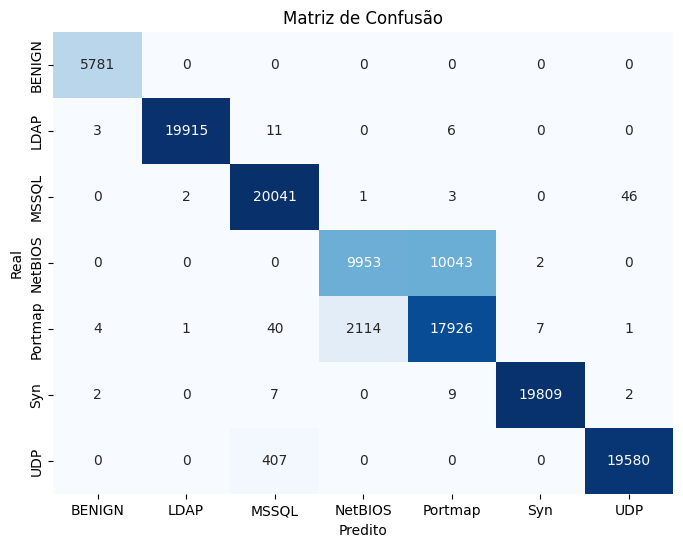

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

print("Matriz de Confusão:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

In [ ]:
unique_values, counts = np.unique(y_test, return_counts=True)

contagem_por_classe = dict(zip(unique_values, counts))

porcentagem_por_classe = {classe: (conf_matrix[i, i] / contagem_por_classe[classe]) * 100
                           for i, classe in enumerate(unique_values)}

print("Porcentagem de acertos por classe:")
print(porcentagem_por_classe)

Porcentagem de acertos por classe:
{0: 100.0, 1: 99.899673940306, 2: 99.7412034041706, 3: 49.76997699769977, 4: 89.21514955457125, 5: 99.89913762670835, 6: 97.96367638965327}


In [ ]:
drive.mount('/content/drive')
df_teste = pd.read_csv('/content/drive/MyDrive/base de dados/dataset_teste.csv', encoding='utf-8', sep=',')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
contagem_por_classe = df_teste[' Label'].value_counts()

print("Contagem de exemplares por classe:")
print(contagem_por_classe)

Contagem de exemplares por classe:
MSSQL      114054
Syn         99978
NetBIOS     99908
Portmap     95273
UDP         73970
LDAP         9931
BENIGN       6886
Name:  Label, dtype: int64


In [ ]:
labels_teste = df_teste[' Label']

data_teste = df_teste.drop(columns=[' Label'])

label_encoder = LabelEncoder()
labels_encoded_teste = label_encoder.fit_transform(labels_teste)

In [ ]:
data_teste = data_teste.drop(columns=['Bwd Avg Bulk Rate', ' Flow Packets/s', ' Bwd Avg Packets/Bulk', ' Bwd Avg Bytes/Bulk', ' Fwd Avg Bulk Rate', ' Fwd Avg Packets/Bulk', 'Fwd Avg Bytes/Bulk', ' ECE Flag Count', ' PSH Flag Count', 'FIN Flag Count', ' Bwd URG Flags', ' Fwd URG Flags', ' Bwd PSH Flags'], axis=1)
indices_selecionados = [0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 32, 34, 35, 36, 37, 38, 41, 43, 44, 47, 55, 56, 58, 66, 67]
data_teste = data_teste.iloc[:, indices_selecionados]

In [ ]:
normalize_dataframe(data_teste)

<ipython-input-4-629f5b553942>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[coluna] = df[coluna] / max_valor  # Divide todos os valores da coluna pelo máximo


In [ ]:
dtest = xgb.DMatrix(data_teste, label=labels_encoded_teste)

y_pred_teste = model.predict(dtest)

accuracy = accuracy_score(labels_encoded_teste, predictions)

print(f'Acurácia: {accuracy}')

Acurácia: 0.838414


Matriz de Confusão:
[[  6885     17     56      4    213      3     13]
 [     0   9777     86      0     11      0      0]
 [     0      7 113328      2    350     14  14876]
 [     1      2      1  44068   8462      0      0]
 [     0    124    218  55830  86168      1      4]
 [     0      4    207      0     61  99954     50]
 [     0      0    158      4      8      6  59027]]


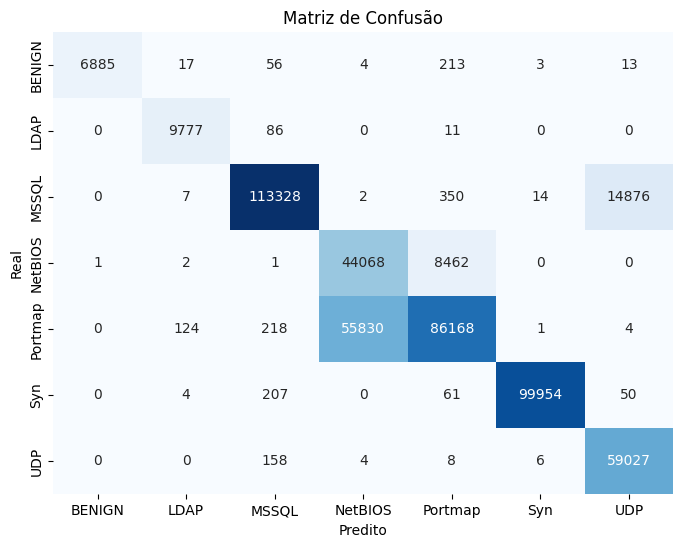

In [ ]:
conf_matrix = confusion_matrix(y_pred_teste, labels_encoded_teste)

print("Matriz de Confusão:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

In [ ]:
unique_values, counts = np.unique(y_pred_teste, return_counts=True)

contagem_por_classe = dict(zip(unique_values, counts))

porcentagem_por_classe = {classe: (conf_matrix[i, i] / contagem_por_classe[classe]) * 100
                           for i, classe in enumerate(unique_values)}
S
print("Porcentagem de acertos por classe:")
print(porcentagem_por_classe)

Porcentagem de acertos por classe:
{0.0: 95.74468085106383, 1.0: 99.0176220376747, 2.0: 88.14018059217435, 3.0: 83.88472227509803, 4.0: 60.534616600512834, 5.0: 99.67888627388407, 6.0: 99.7027177676807}
